## **RNN, LSTM 실습**

### **1. LSTM 주가 예측**

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [93]:
df = pd.read_csv("C:/Users/samsung-user/OneDrive/바탕 화면/인공지능개론/AAME.csv")

In [94]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.0,4.05,3.85,3.85,3.213167,15000
1,1980-03-18,0.0,4.00,3.80,3.80,3.171437,10200
2,1980-03-19,0.0,4.05,3.85,3.85,3.213167,33500
3,1980-03-20,0.0,4.00,3.80,3.80,3.171437,8700
4,1980-03-21,0.0,3.95,3.75,3.75,3.129709,12700


In [95]:
openValues = df[['Open']]

In [96]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaled = scaler.fit_transform(openValues)

In [97]:
TEST_SIZE = 200
train_data = scaled[:-TEST_SIZE]
test_data = scaled[-TEST_SIZE:]

In [98]:
def make_sample(data, window):
    train = []
    target = []
    for i in range(len(data)-window):
        train.append(data[i:i+window])
        target.append(data[i + window])
    return np.array(train), np.array(target)

X_train, y_train = make_sample(train_data, 30)

In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(LSTM(16,
               input_shape=(X_train.shape[1], 1),
               activation='tanh',
               return_sequences=False)
         )
model.add(Dense(1))

C:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [100]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=16)

Epoch 1/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - loss: 0.0065
Epoch 2/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.0021
Epoch 3/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 0.0023
Epoch 4/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 0.0025
Epoch 5/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 0.0026
Epoch 6/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.0027
Epoch 7/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 0.0027
Epoch 8/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.0020
Epoch 9/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 0.0026
Epoch 10/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 0.0022
Epoch 11/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 0.0021
Epoch 12/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - loss: 0.0023
Epoch 13/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.0029
Epoch 14/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 0.0029
Epoch 15/100
617/617 ━━━━━━━

In [101]:
X_test, y_test = make_sample(test_data, 30)
pred = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step


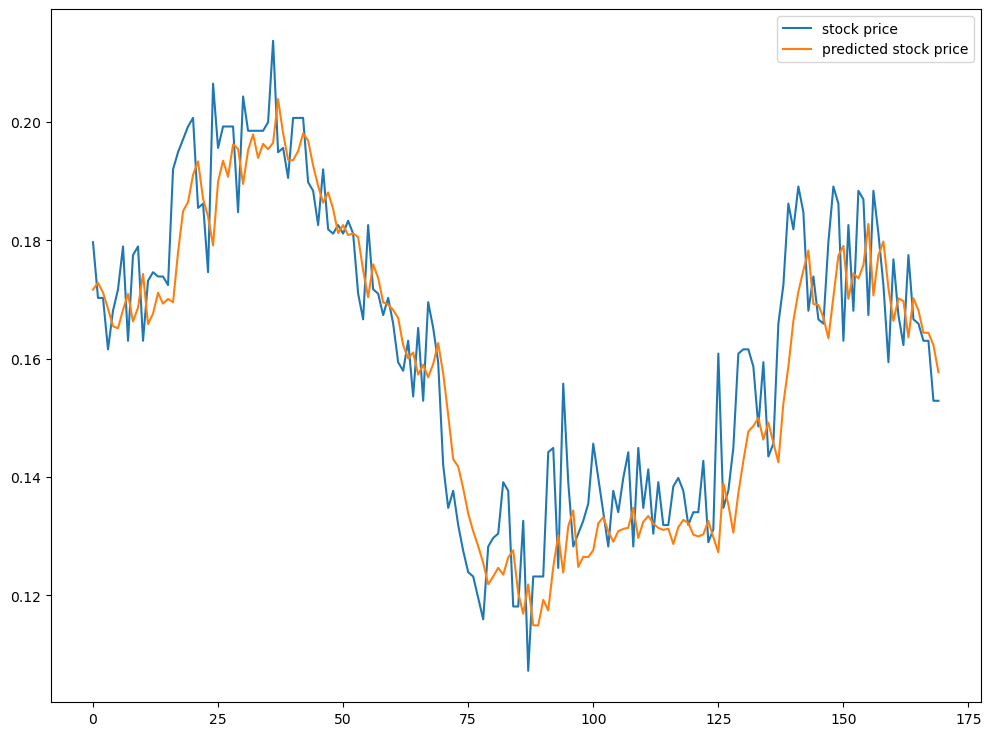

In [102]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
plt.plot(y_test, label='stock price')
plt.plot(pred, label='predicted stock price')
plt.legend()
plt.show()

### **2. RNN 주가 예측**

In [103]:
from tensorflow.keras.layers import SimpleRNN

In [107]:
model = Sequential()
model.add(SimpleRNN(10, activation='tanh', input_shape=(10,1)))
model.add(Dense(1, activation='tanh'))
model.compile(optimizer='adam', loss='mse')

In [108]:
model.fit(X_train, y_train, epochs=100, batch_size=16)

Epoch 1/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0585
Epoch 2/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0039
Epoch 3/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0029
Epoch 4/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0028
Epoch 5/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0026
Epoch 6/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0027
Epoch 7/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0023
Epoch 8/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0023
Epoch 9/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0023
Epoch 10/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0025
Epoch 11/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0028
Epoch 12/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0023
Epoch 13/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0027
Epoch 14/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0030
Epoch 15/100
617/617 ━━━━━━━━━━━━━━━━━━━━ 4

In [109]:
X_test, y_test = make_sample(test_data, 30)
pred = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step


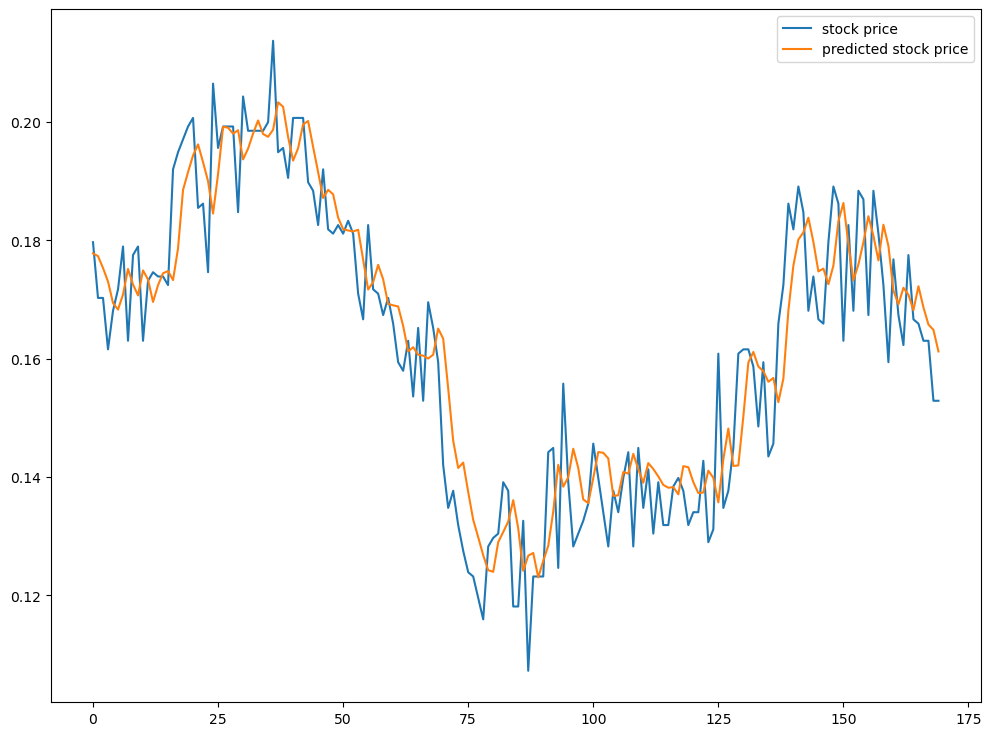

In [110]:
plt.figure(figsize=(12,9))
plt.plot(y_test, label='stock price')
plt.plot(pred, label='predicted stock price')
plt.legend()
plt.show()